# The Lotka-Volterra Equations

In the Canadian arctic, the main food of canadian lynx are snowshoe hares. While hares reproduce quickly (they are a type of rabbit, after all), if lynx predate too many hares, the population of hares crashes. This then leads to lynx having few to no kittens, and so the population of lynx reduces, allowing the hare population to recover. This in turns allows for more lynx kittens to survive and predation to rise again. Thise dynamics leads to a surprising phenomenon: **predator-prey population oscillations** in the lynx and hare numbers.

The simplest model of these predator-prey oscillations are the Lotka-Volterra equations:
Let $H$ be the density of hares in a region, and $L$ the corresponding density of lynx, both in dimensionless units. Then the dynamics of $h$ and $l$ are given by
\begin{align}
\frac{dH}{dt} &= b H - p H L \\
\frac{dL}{dt} &= - d L + r L H.
\end{align}
Here $b$ is the net birth rate of hares, $b>0$ always (they do breed like rabbits). The term $p H L$ expresses the rate of predation of hares by lynx, which reduces the hare population. The number of lynx decreases with their death rate $d$, but increases due to preying on hares with rate $r$.

We will numerically integrate the Lotka-Volterra equations using a 4th order Runge-Kutta integrator. To make the remainder of this work, we will wrap the whole solution into a function which takes as arguments the Lotka-Volterra parameters, the initial conditions, the time step and the time interval, and returns arrays for hare and lynx populations.

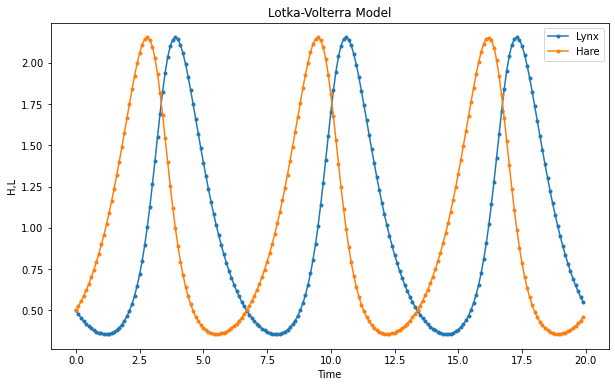

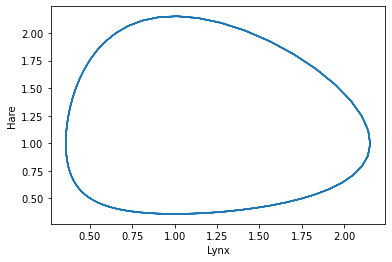

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lag

def main(t,H,L,dt,b,p,d,r):
    dH = b*H - p*H*L
    dL = -d*L + r*L*H
    return dH*dt,dL*dt

def LotkaVolterra(b,p,d,r,H0,L0,dt,T):
    N = int(T/dt)
    t = np.zeros((N))
    H = np.zeros((N))
    L = np.zeros((N))
    H[0] = H0
    L[0] = H0
    for n in range(0,N-1):
        k1_dH, k1_dL = main(t[n], H[n], L[n], dt, b, p, d, r)
        k2_dH, k2_dL = main(t[n] + dt/2, H[n] + k1_dH/2, L[n] + k1_dL/2,dt,b,p,d,r)
        k3_dH, k3_dL = main(t[n] + dt/2, H[n] + k2_dH/2, L[n] + k2_dL/2,dt,b,p,d,r)
        k4_dH, k4_dL = main(t[n] + dt, H[n] + k3_dH, L[n] + k3_dL,dt,b,p,d,r)
        t[n+1] = t[n] + dt
        H[n+1] = H[n] + (k1_dH + 2*k2_dH + 2*k3_dH + k4_dH)/6
        L[n+1] = L[n] + (k1_dL + 2*k2_dL + 2*k3_dL + k4_dL)/6
    return t, H, L

t,H,L = LotkaVolterra(1,1,1,1,0.5,0.5,0.1,20)
    
plt.figure(figsize = (10,6))
plt.plot(t,L,'.-', label = 'Lynx')
plt.plot(t,H,'.-', label = 'Hare')
plt.xlabel('Time')
plt.ylabel('H,L')
plt.title("Lotka-Volterra Model")
plt.legend()
plt.show()
plt.xlabel("Lynx")
plt.ylabel("Hare")
plt.plot(L,H)
plt.show()

In [3]:
# Basic test of your function. Make sure your syntax is right!
time,hare,lynx = LotkaVolterra(1,1,1,1,1,1,0.01,20)

assert (np.std(hare)<1e-14)
assert (np.std(lynx)<1e-14)

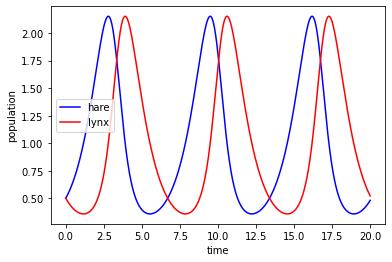

In [4]:
# tests
time,hare,lynx = LotkaVolterra(1,1,1,1,0.5,0.5,0.001,20)
assert (abs(np.std(hare)-0.612)<1e-3)
assert (abs(np.std(lynx)-0.612)<1e-3)

# Not a test, just a visualisation to help you see what is happening
plt.figure()
plt.plot(time,hare,'-b',label='hare')
plt.plot(time,lynx,'-r',label='lynx')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()



The Lotka-Volterra equations are integrable, and in particular, there is a conserved quantity associated to them, which can be expressed as
\begin{equation} C = b \log L - p L -r H + d \log H, \end{equation}
where $\log$ is the natural logarithm, aka `np.log(x)`.

We will now write a function that computes the conserved quantity, if given the 4 parameters and initial conditions for H and L. To do this, we will call our LotkaVolterra function from inside this new function, with the correct 4 parameters, and a suitable integration range (not too long) and time step (small). Then make it compute solutions, and then use these solutions to compute the $C$ vector. 

We will check that $C$ is approximately constant by creating a plot inside the function.

Finally, we will take the average of $C$. This will be our result: make it the return argument of the function.

In [5]:
def conserved(b,p,d,r,H0,L0):
    t = LotkaVolterra(b,p,d,r,H0,L0,0.05,20)[0]
    H = LotkaVolterra(b,p,d,r,H0,L0,0.05,20)[1]
    L = LotkaVolterra(b,p,d,r,H0,L0,0.05,20)[2]
    C = b*np.log(L) - p*L - r*H + d*np.log(H)
    cval = np.mean(C)
    plt.figure(figsize=(6,4))
    plt.plot(t,C, '.r')
    plt.plot(t,C, '.b')
    plt.xlabel('t')
    plt.ylabel('C')
    plt.show()
    return cval

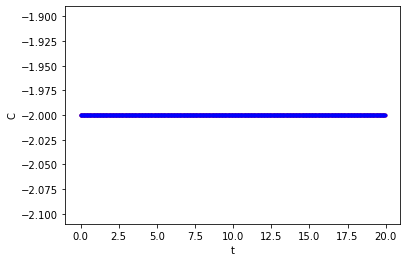

In [6]:
cval = conserved(1,1,1,1,1.0,1.0)
assert abs(cval+2.0)<1e-14

For a given set of $b,p,h,l$, the amplitude of the predator-prey oscillations strongly depends on the initial conditions for the population. We will again choose $b=p=d=r=1$ for simplicity.

We will now construct a phase space plot of $H$ vs. $L$ (on the $y$ and $x$ axis, respectively), that combines several initial conditions on the same plot. Additionally, we will compute the value of $C$ for each initial condition.

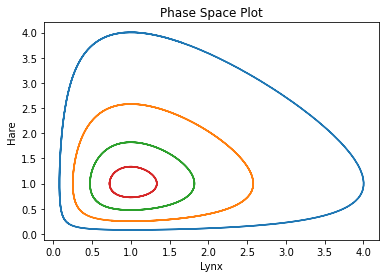

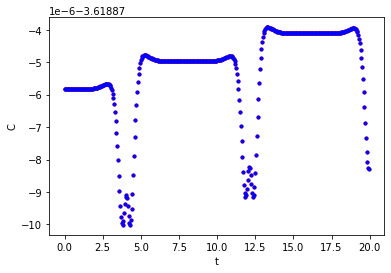

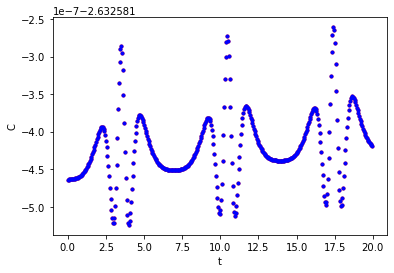

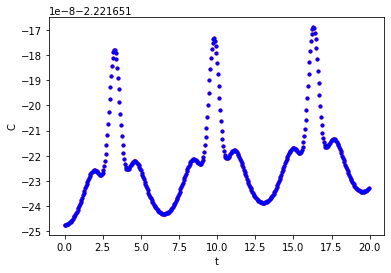

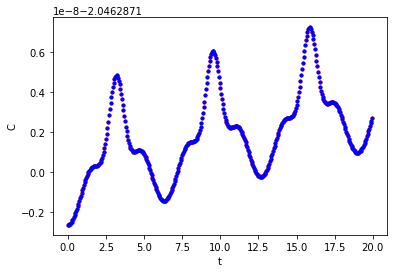

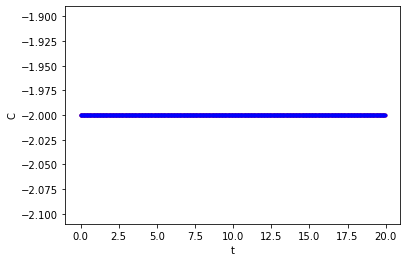

-3.6188753501440614 -2.632581420846262 -2.221651222312159 -2.0462870981466885 -2.0


In [7]:
H = LotkaVolterra(1,1,1,1,0.2,0.2,0.05,20)[1]
L = LotkaVolterra(1,1,1,1,0.2,0.2,0.05,20)[2]
H2 = LotkaVolterra(1,1,1,1,0.4,0.4,0.05,20)[1]
L2 = LotkaVolterra(1,1,1,1,0.4,0.4,0.05,20)[2]
H3 = LotkaVolterra(1,1,1,1,0.6,0.6,0.05,20)[1]
L3 = LotkaVolterra(1,1,1,1,0.6,0.6,0.05,20)[2]
H4 = LotkaVolterra(1,1,1,1,0.8,0.8,0.05,20)[1]
L4 = LotkaVolterra(1,1,1,1,0.8,0.8,0.05,20)[2]
H5 = LotkaVolterra(1,1,1,1,1.0,1.0,0.05,20)[1]
L5 = LotkaVolterra(1,1,1,1,1.0,1.0,0.05,20)[2]

plt.xlabel("Lynx")
plt.ylabel("Hare")
plt.title("Phase Space Plot")
plt.plot(L,H)
plt.plot(L2,H2)
plt.plot(L3,H3)
plt.plot(L4,H4)
plt.plot(L5,H5)
plt.show()

c1 = conserved(1,1,1,1,0.2,0.2)
c2 = conserved(1,1,1,1,0.4,0.4)
c3 = conserved(1,1,1,1,0.6,0.6)
c4 = conserved(1,1,1,1,0.8,0.8)
c5 = conserved(1,1,1,1,1.0,1.0)

print(c1,c2,c3,c4,c5)